In [9]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [21]:
# 3
train_image_generator = ImageDataGenerator(
    rescale=1.0/255,
)

validation_image_generator = ImageDataGenerator(rescale=1.0/255)
test_image_generator = ImageDataGenerator(rescale=1.0/255)

train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    batch_size=batch_size,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)
val_data_gen = validation_image_generator.flow_from_directory(
    directory=validation_dir,
    batch_size=batch_size,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)
test_data_gen = test_image_generator.flow_from_directory(
    directory=PATH,
    classes=['test'],
    batch_size=batch_size,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode=None,
    shuffle=False
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


In [19]:
import os
print(os.listdir(test_dir))
print(os.listdir(train_dir))
print(os.listdir(validation_dir))


['6.jpg', '33.jpg', '14.jpg', '2.jpg', '27.jpg', '40.jpg', '1.jpg', '21.jpg', '12.jpg', '35.jpg', '45.jpg', '48.jpg', '5.jpg', '11.jpg', '28.jpg', '39.jpg', '4.jpg', '41.jpg', '15.jpg', '49.jpg', '18.jpg', '32.jpg', '20.jpg', '7.jpg', '29.jpg', '23.jpg', '36.jpg', '24.jpg', '42.jpg', '31.jpg', '.DS_Store', '46.jpg', '38.jpg', '30.jpg', '34.jpg', '13.jpg', '44.jpg', '26.jpg', '19.jpg', '8.jpg', '17.jpg', '16.jpg', '9.jpg', '43.jpg', '10.jpg', '47.jpg', '22.jpg', '37.jpg', '25.jpg', '3.jpg', '50.jpg']
['cats', 'dogs', '.DS_Store']
['cats', 'dogs', '.DS_Store']


In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [22]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [40]:
# 7
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy,
              metrics=['accuracy']
)

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 34, 34, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 73984)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │       4,735,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,791,425 (18.28 MB)

 Trainable params: 4,791,425 (18.28 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# 8

steps_per_epoch = total_train//batch_size
validation_steps = total_val//batch_size
history = model.fit(
    x=train_data_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=validation_steps
)

Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 127s 8s/step - accuracy: 0.4840 - loss: 1.2466 - val_accuracy: 0.5145 - val_loss: 0.6915
Epoch 2/15
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1:41 7s/step - accuracy: 0.4922 - loss: 0.6929

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.4922 - loss: 0.6929 - val_accuracy: 0.4712 - val_loss: 0.6985
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 129s 7s/step - accuracy: 0.5053 - loss: 0.6951 - val_accuracy: 0.4989 - val_loss: 0.6931
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.4609 - loss: 0.6932 - val_accuracy: 0.5096 - val_loss: 0.6931
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 123s 8s/step - accuracy: 0.5025 - loss: 0.6932 - val_accuracy: 0.4967 - val_loss: 0.6932
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.5234 - loss: 0.6922 - val_accuracy: 0.5288 - val_loss: 0.6904
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 123s 8s/step - accuracy: 0.4922 - loss: 0.6932 - val_accuracy: 0.5078 - val_loss: 0.6934
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.5312 - loss: 0.6921 - val_accuracy: 0.4327 - val_loss: 0.6969
Epoch 9/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 134s 8s/step - accuracy: 0.4961 - loss: 0.6937 - val_accuracy: 0.5011 - val_loss: 0.

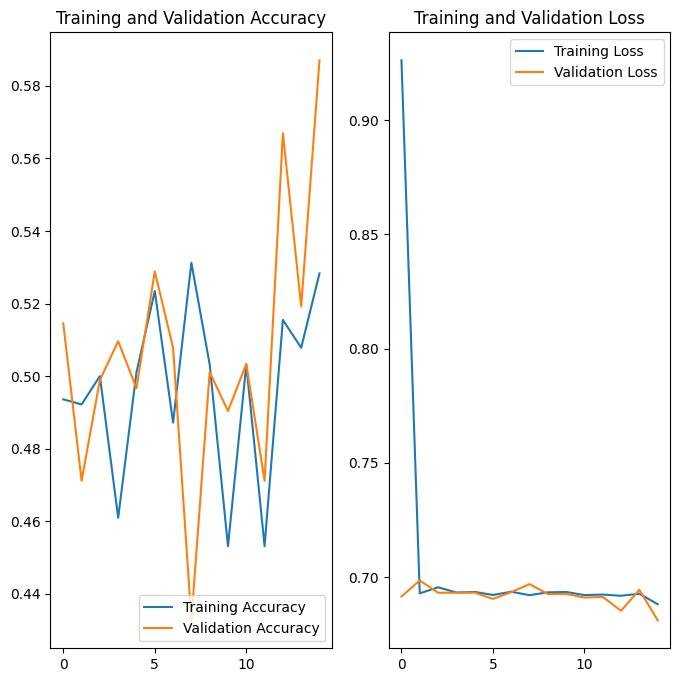

In [42]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [43]:
probabilities=model.predict(test_data_gen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [44]:
print(probabilities)

[[0.45351845]
 [0.424533  ]
 [0.5345825 ]
 [0.5247497 ]
 [0.505249  ]
 [0.48690507]
 [0.5146656 ]
 [0.49390507]
 [0.51774484]
 [0.531436  ]
 [0.5031613 ]
 [0.5076978 ]
 [0.4136167 ]
 [0.45597517]
 [0.46585152]
 [0.52760845]
 [0.4597831 ]
 [0.523937  ]
 [0.45941976]
 [0.528201  ]
 [0.51825774]
 [0.5047564 ]
 [0.5228837 ]
 [0.53347975]
 [0.5189677 ]
 [0.53538024]
 [0.5296704 ]
 [0.46975186]
 [0.4726692 ]
 [0.52941257]
 [0.5181775 ]
 [0.5242606 ]
 [0.5460541 ]
 [0.53199124]
 [0.52411073]
 [0.5276264 ]
 [0.50239617]
 [0.4396159 ]
 [0.4731556 ]
 [0.5218936 ]
 [0.5168531 ]
 [0.5345547 ]
 [0.5142654 ]
 [0.4530357 ]
 [0.5318332 ]
 [0.39922562]
 [0.49471954]
 [0.5178426 ]
 [0.5004321 ]
 [0.53482777]]


In [45]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if np.round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 52.0% of the images of cats and dogs.
You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!
